Popup design logic

In [248]:
# Cell 1: Imports and Magic Commands
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from midvoxio.voxio import vox_to_arr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
from popup_logic import optimize_popup_volume
from popup_logic import visualize_results
from popup_logic import generate_blueprint
from popup_logic import validate_grid_connectivity

Input grid is valid: False
Input grid has 14 errors
Output grid is valid: False
Output grid has 12 errors


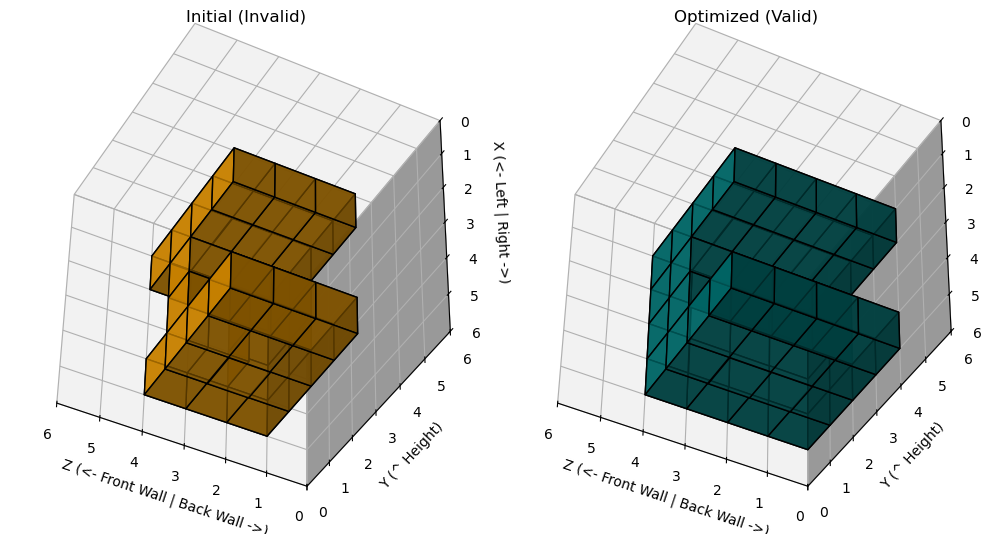

In [244]:
# --- TEST CASE ---
GRIDSIDE = 6
grid_size = (GRIDSIDE, GRIDSIDE, GRIDSIDE)
test_grid = np.zeros(grid_size)

# Floating block with some holes
test_grid[1:4, 1:2, 1:4] = 1
test_grid[1:4, 0, 1:2] = 1
test_grid[1, 0:4, 1:4] = 1
test_grid[4, 0:4, 1:4] = 1

output = optimize_popup_volume(test_grid, add_cost=1, remove_cost=1.1)

# Check validity of input and output
is_valid_input, errors_input = validate_grid_connectivity(test_grid)
is_valid_output, errors_output = validate_grid_connectivity(output)

print(f"Input grid is valid: {is_valid_input}")
if not is_valid_input:
    print(f"Input grid has {len(errors_input)} errors")

print(f"Output grid is valid: {is_valid_output}")
if not is_valid_output:
    print(f"Output grid has {len(errors_output)} errors")

visualize_results(test_grid, output, size=GRIDSIDE)


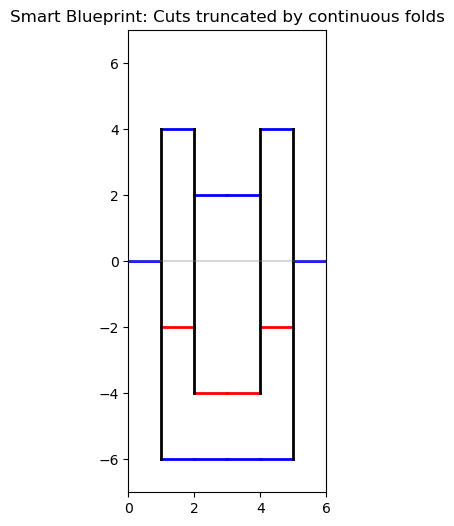

In [245]:
generate_blueprint(output)

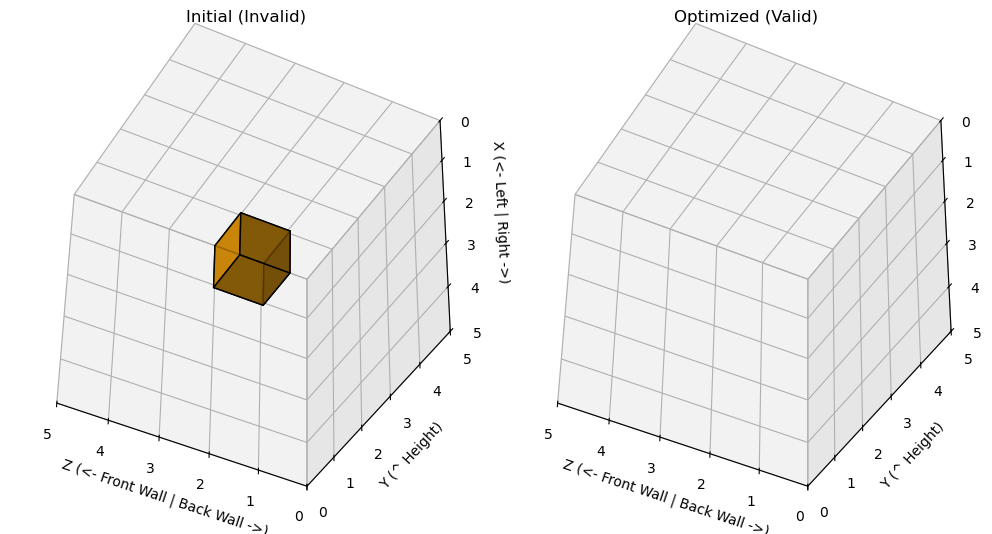

In [234]:
# --- TEST CASE: floating speck ---
GRIDSIDE = 5
grid_size = (GRIDSIDE, GRIDSIDE, GRIDSIDE)
test_grid = np.zeros(grid_size)

test_grid[2, 2, 2] = 1

output = optimize_popup_volume(test_grid, add_cost=1, remove_cost=1)

visualize_results(test_grid, output, size=GRIDSIDE)

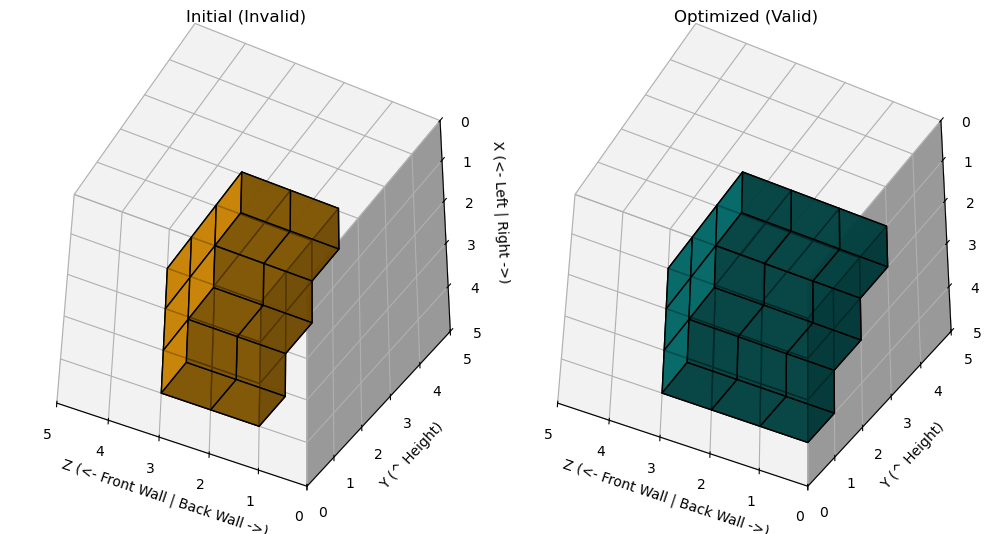

In [246]:
# --- TEST CASE stairs ---
GRIDSIDE = 5
grid_size = (GRIDSIDE, GRIDSIDE, GRIDSIDE)
test_grid = np.zeros(grid_size)

test_grid[1, 0:3, 1:3] = 1
test_grid[2, 0:2, 1:3] = 1
test_grid[3, 0:1, 1:3] = 1

output = optimize_popup_volume(test_grid, add_cost=1, remove_cost=1)

visualize_results(test_grid, output, size=GRIDSIDE)


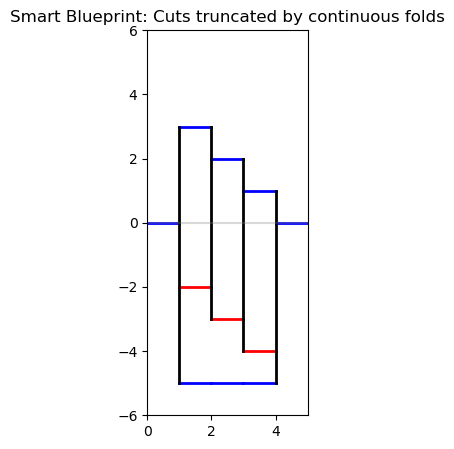

In [247]:
generate_blueprint(output)

In [271]:
# read test data
VOX = "./vox_files/stairs.vox"
voxel_array_full = vox_to_arr(VOX)

# get first three dimensions and swap z and y axes
voxel_array_3d = voxel_array_full[:,:,:,0]
voxel_array_3d = np.flip(voxel_array_3d, axis = 1)
voxel_array_3d = np.transpose(voxel_array_3d, axes = (0, 2, 1))

# binarize
voxel_array_3d_binarized = (voxel_array_3d > 0).astype(float)

voxel_array_3d_binarized.shape

(20, 20, 20)

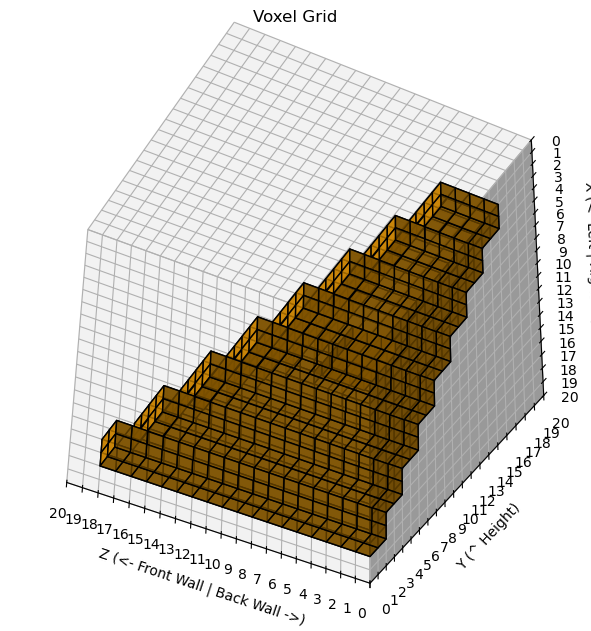

In [272]:
visualize_results(voxel_array_3d_binarized, None, max(voxel_array_3d_binarized.shape))

In [273]:
vox_output = optimize_popup_volume(voxel_array_3d_binarized, add_cost=1, remove_cost=1)


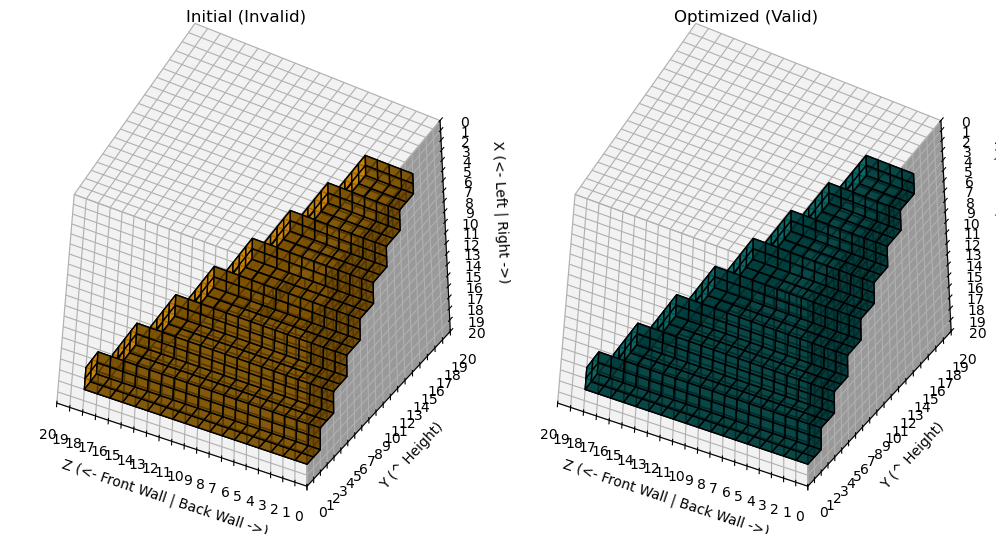

In [274]:
visualize_results(voxel_array_3d, vox_output, max(voxel_array_3d.shape))

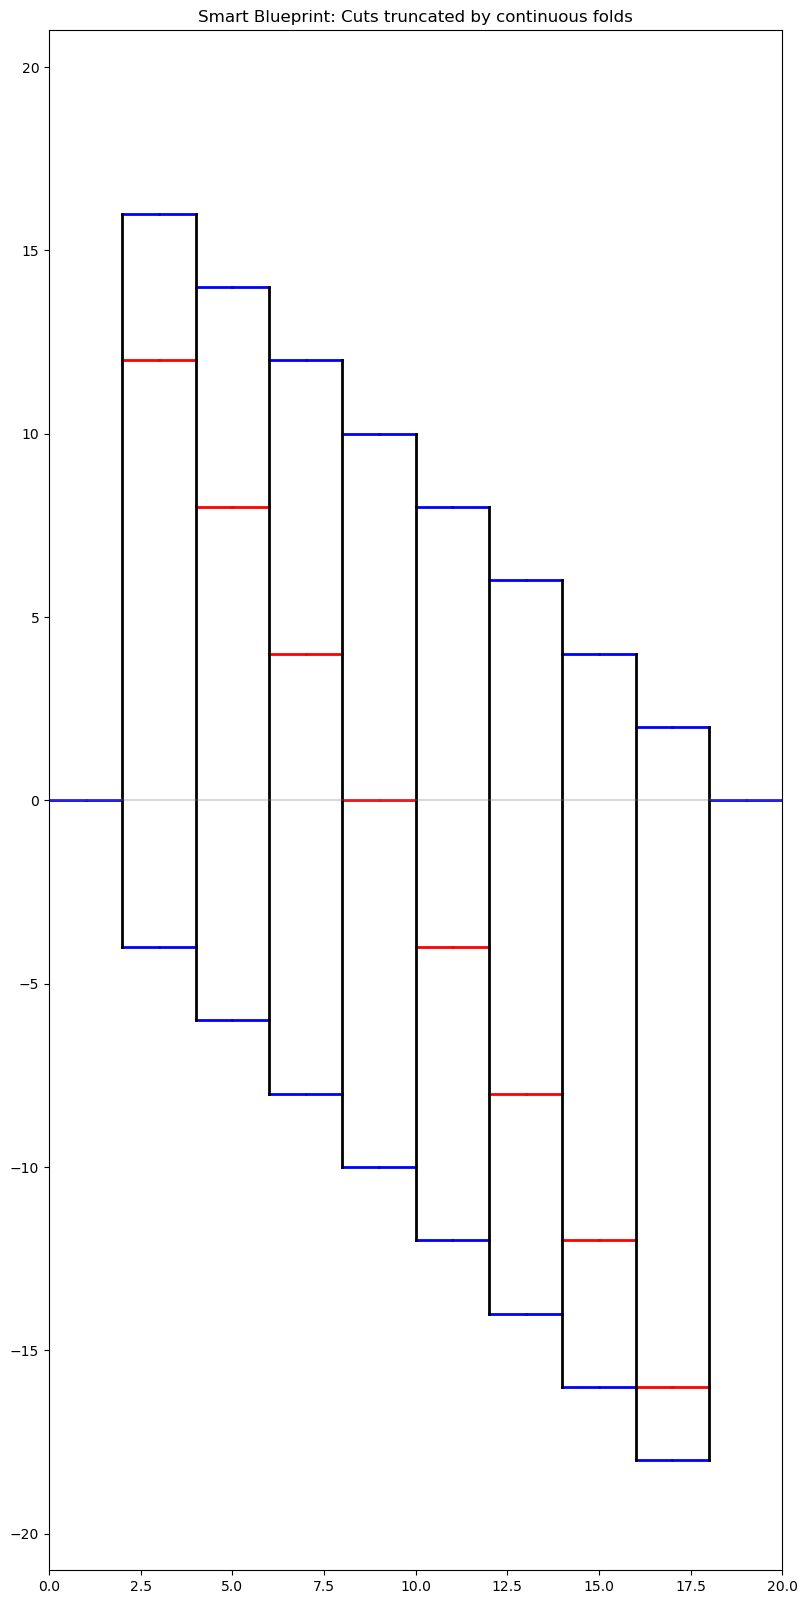

In [276]:
generate_blueprint(vox_output)